Level 3 - Task Predictive Modeling

In [106]:
import pandas as pd
import numpy as np


In [107]:
df=pd.read_csv('Dataset .csv')

In [108]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
667,2400019,Bikanerwala,1,Allahabad,"2A, JMD Bhawan, Strachey Road, Civil Lines, Al...",Civil Lines,"Civil Lines, Allahabad",81.832616,25.451517,"North Indian, Street Food, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,3,3.2,Orange,Average,51
3021,18070476,Cafe Dalal Street,1,New Delhi,"M-89/90, M Block, Outer Circle, Connaught Plac...",Connaught Place,"Connaught Place, New Delhi",77.222867,28.633252,"North Indian, European",...,Indian Rupees(Rs.),No,Yes,No,No,3,3.7,Yellow,Good,873
3973,18287398,Zaika Kathi Roll,1,New Delhi,"137, Gautam Nagar Nala, Near Hauz Khas, Hauz K...",Hauz Khas,"Hauz Khas, New Delhi",77.209538,28.560385,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,3
5491,8373,KFC,1,New Delhi,"12 & 13, 2nd Floor, Food Court, Moments Mall, ...","Moments Mall, Kirti Nagar","Moments Mall, Kirti Nagar, New Delhi",77.146794,28.657144,"American, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,2.6,Orange,Average,87
561,17694056,Theo Yianni's Authentic Greek Restaurant,216,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [109]:
''' Build a regression model to predict the
 aggregate rating of a restaurant based on
 available features.
 Split the dataset into training and testing sets
 and evaluate the model's performance using
 appropriate metrics.'''

" Build a regression model to predict the\n aggregate rating of a restaurant based on\n available features.\n Split the dataset into training and testing sets\n and evaluate the model's performance using\n appropriate metrics."

In [110]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [111]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['Country Code', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range', 'Votes']
target = 'Aggregate rating'

# Define X and y
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['Has Table booking', 'Has Online delivery']
numerical_features = ['Country Code', 'Average Cost for two', 'Price range', 'Votes']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Linear Regression pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Decision Tree Regressor pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Random Forest Regressor pipeline
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# List of pipelines
pipelines = [
    ('Linear Regression', linear_pipeline),
    ('Decision Tree', tree_pipeline),
    ('Random Forest', forest_pipeline)
]

# Train and evaluate each model
for name, pipeline in pipelines:
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-----------------------")


Model: Linear Regression
Mean Squared Error: 1.60
R-squared: 0.30
-----------------------
Model: Decision Tree
Mean Squared Error: 0.20
R-squared: 0.91
-----------------------
Model: Random Forest
Mean Squared Error: 0.13
R-squared: 0.94
-----------------------


In [ ]:
#  Analyze the relationship between the type of
 #cuisine and the restaurant's rating.

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

C:\Users\shery\AppData\Local\Temp\ipykernel_1264\3093081103.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)
C:\Users\shery\AppData\Local\Temp\ipykernel_1264\3093081103.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))


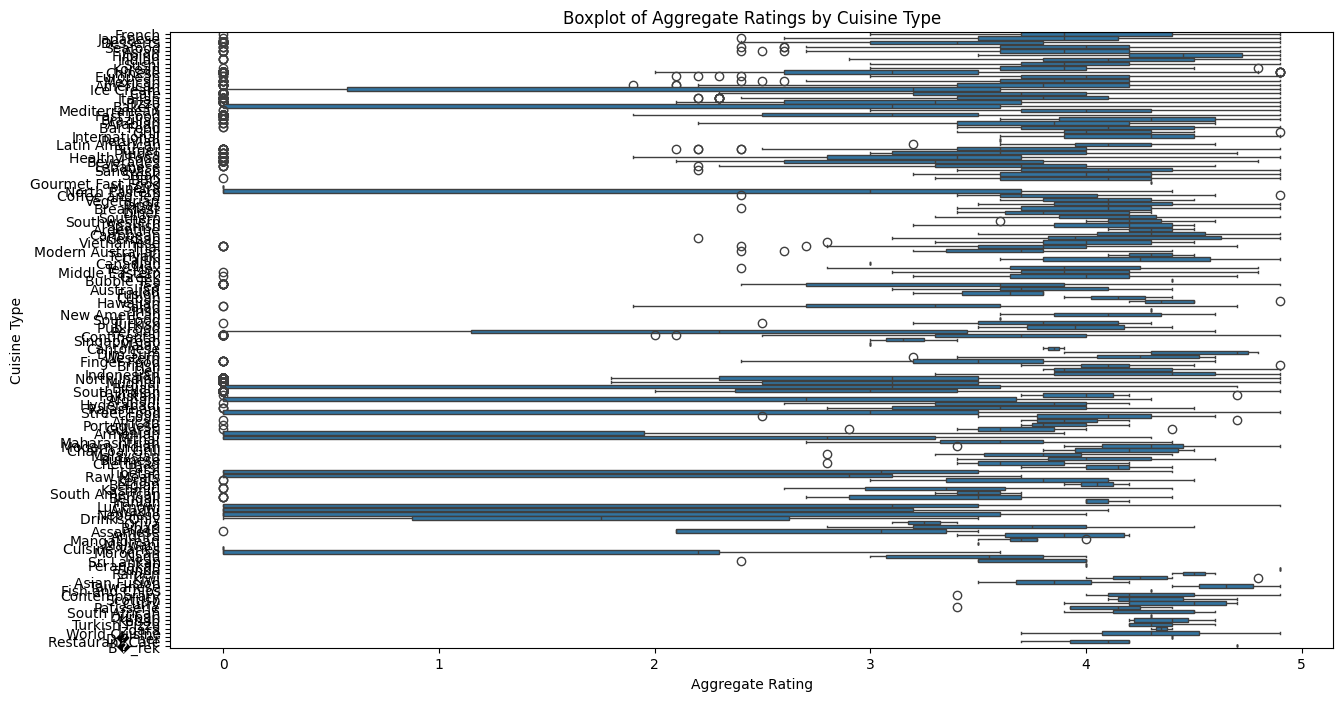

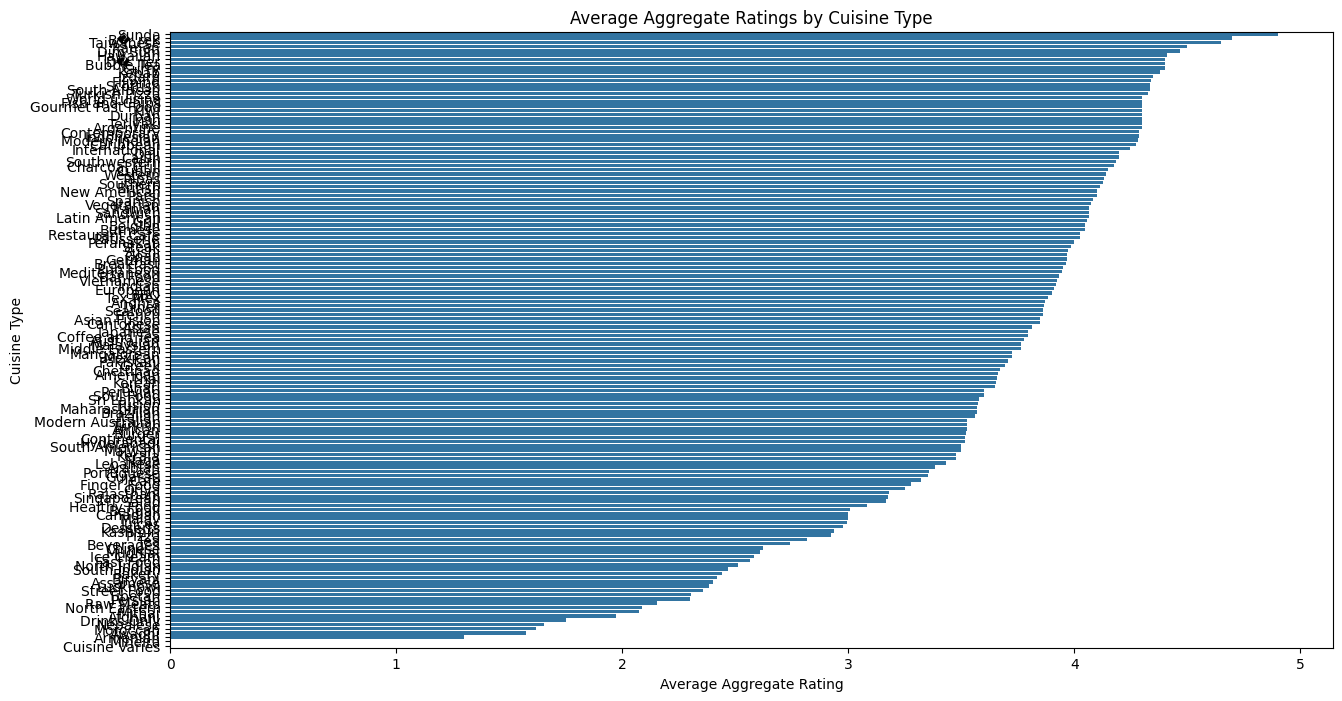

ANOVA test result: F-statistic = 21.932645721661597, p-value = 0.0
There are significant differences in ratings among different cuisines.


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load your data into a DataFrame `df`
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and specify your dataset path

# For demonstration, let's assume df is already available

# Check the first few rows of the DataFrame
print(df.head())

# Step 1: Data Preparation
# Select relevant columns
data = df[['Cuisines', 'Aggregate rating']]

# Drop rows with missing values in these columns
data.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
# Split cuisines into individual cuisines if they are combined
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))

# Explode the DataFrame so each row is a single cuisine type
data = data.explode('Cuisines')

# Check the distribution of ratings for different cuisines
print(data.groupby('Cuisines')['Aggregate rating'].describe())

# Step 3: Visualization
plt.figure(figsize=(15, 8))
sns.boxplot(x='Aggregate rating', y='Cuisines', data=data)
plt.title('Boxplot of Aggregate Ratings by Cuisine Type')
plt.xlabel('Aggregate Rating')
plt.ylabel('Cuisine Type')
plt.show()

# Bar plot for average ratings by cuisine
plt.figure(figsize=(15, 8))
avg_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings, y=avg_ratings.index)
plt.title('Average Aggregate Ratings by Cuisine Type')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Type')
plt.show()

# Step 4: Statistical Analysis
# ANOVA test to check if there are significant differences in ratings among different cuisines
cuisine_groups = [group['Aggregate rating'].values for name, group in data.groupby('Cuisines')]
anova_result = f_oneway(*cuisine_groups)

print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpretation of the ANOVA result
if anova_result.pvalue < 0.05:
    print("There are significant differences in ratings among different cuisines.")
else:
    print("There are no significant differences in ratings among different cuisines.")


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

C:\Users\shery\AppData\Local\Temp\ipykernel_1264\1788887241.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Cuisines', 'Votes'], inplace=True)
C:\Users\shery\AppData\Local\Temp\ipykernel_1264\1788887241.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))
C:\Users\shery\AppData\Local\Temp\ipykernel_1264\1788887241.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend

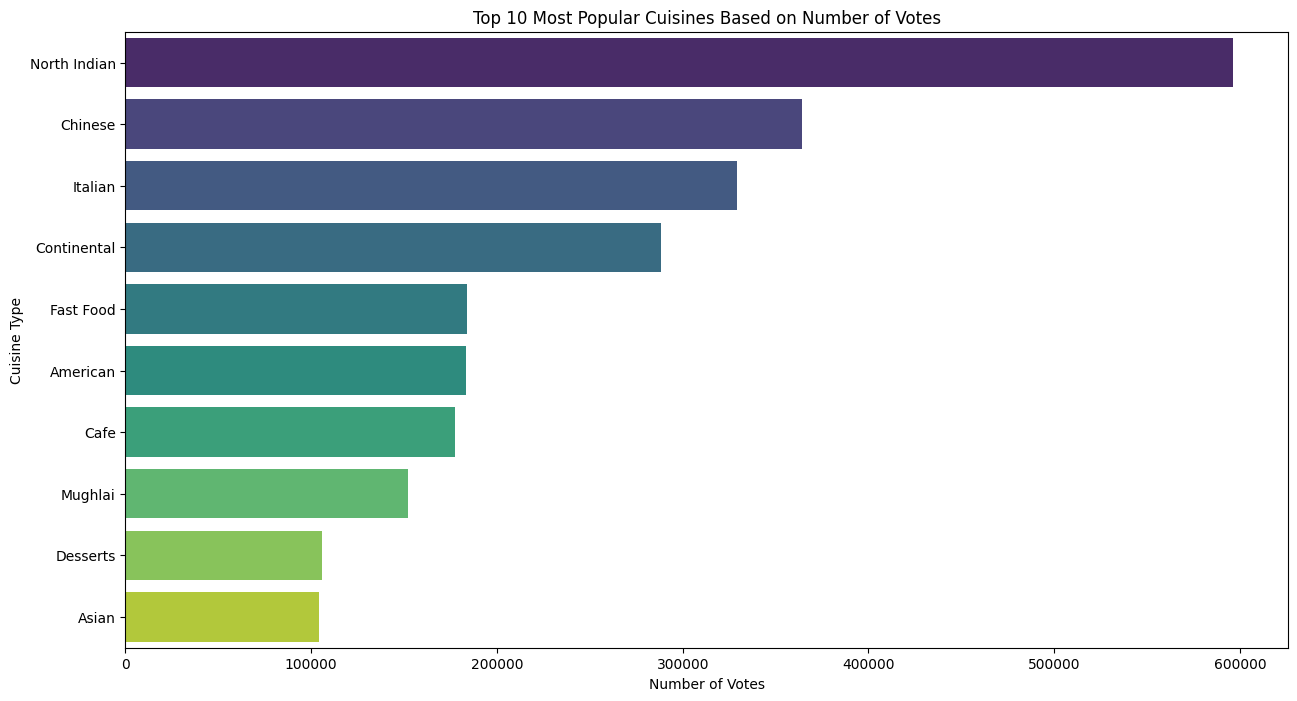

In [113]:
print(df.head())

# Step 1: Data Preparation
# Select relevant columns
data = df[['Cuisines', 'Votes']]

# Drop rows with missing values in these columns
data.dropna(subset=['Cuisines', 'Votes'], inplace=True)

# Step 2: Explode the Cuisine Column
# Split cuisines into individual cuisines if they are combined
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))

# Explode the DataFrame so each row is a single cuisine type
data = data.explode('Cuisines')

# Step 3: Calculate Total Votes for Each Cuisine
# Group by cuisines and sum the votes
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort the cuisines by the number of votes in descending order
cuisine_votes = cuisine_votes.sort_values(by='Votes', ascending=False)

# Check the most popular cuisines
print(cuisine_votes.head(10))  # Display top 10 cuisines

# Step 4: Visualization
plt.figure(figsize=(15, 8))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes.head(10), palette='viridis')
plt.title('Top 10 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine Type')
plt.show()


#  Determine if there are any specific cuisines that tend to receive higher ratings.

In [118]:
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

C:\Users\shery\AppData\Local\Temp\ipykernel_1264\915423913.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)
C:\Users\shery\AppData\Local\Temp\ipykernel_1264\915423913.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))
C:\Users\shery\AppData\Local\Temp\ipykernel_1264\915423913.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set

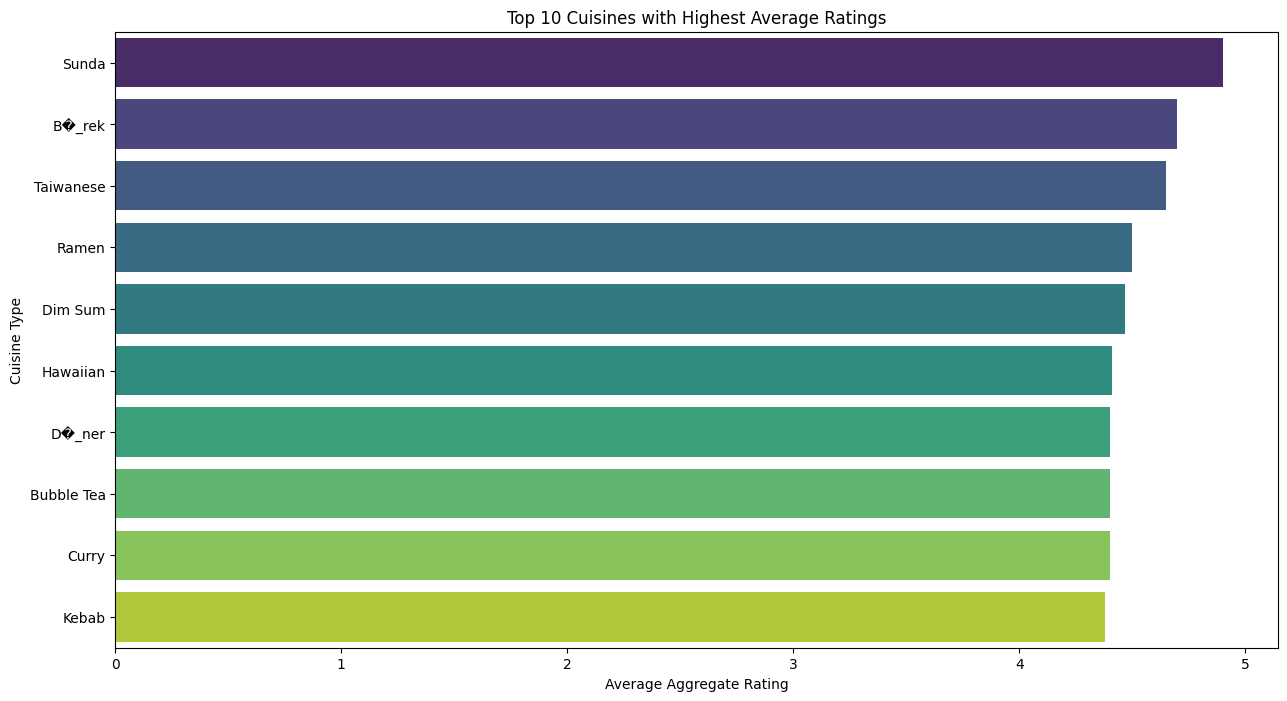

ANOVA test result: F-statistic = 21.932645721661597, p-value = 0.0
There are significant differences in ratings among different cuisines.


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Step 1: Data Preparation
# Select relevant columns
data = df[['Cuisines', 'Aggregate rating']]

# Drop rows with missing values in these columns
data.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)

# Step 2: Explode the Cuisine Column
# Split cuisines into individual cuisines if they are combined
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))

# Explode the DataFrame so each row is a single cuisine type
data = data.explode('Cuisines')

# Step 3: Calculate Average Ratings for Each Cuisine
# Group by cuisines and calculate the mean rating
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort the cuisines by the average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Check the cuisines with the highest average ratings
print(cuisine_ratings.head(10))  # Display top 10 cuisines

# Step 4: Visualization
plt.figure(figsize=(15, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(10), palette='viridis')
plt.title('Top 10 Cuisines with Highest Average Ratings')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Type')
plt.show()

# Step 5: Statistical Analysis
# ANOVA test to check if there are significant differences in ratings among different cuisines
cuisine_groups = [group['Aggregate rating'].values for name, group in data.groupby('Cuisines')]
anova_result = f_oneway(*cuisine_groups)

print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpretation of the ANOVA result
if anova_result.pvalue < 0.05:
    print("There are significant differences in ratings among different cuisines.")
else:
    print("There are no significant differences in ratings among different cuisines.")
